<center>
<img src="https://i.ibb.co/Ycs11Fg/meme.jpg">
</center>

# Андан на экономе: домашнее задание 3
## Задача классификации

**ФИО:**


## Общая информация


__Дата выдачи:__ 14.04.2023

__Мягкий дедлайн:__ 23:59MSK 07.05.2023

__Жесткий дедлайн:__ 23:59MSK 14.05.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [199]:
# Ваш код здесь
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import category_encoders as ce

# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

## Задача 

В данном задании вам необходимо построить предсказательную модель, определяющую пол клиента по его банковским транзакциям.

Вам доступны 2 файла:
* __transaction.csv__ - файл с транзакциями, колонки:
    * user_id - целочисленный идентификатор пользователя
    * dt - дата и время совершения транзации, принцип кодирования: "DAY TIME"
        * DAY - порядковый день транзации с начала сбора данных
        * TIME - время в формате hh:mm:ss
    * type - тип (категория) совершаемой транзакции
    * value - сумма транзакции
    
* __gender.csv__ - файл с данными о полах клиентов.
    * user_id - целочисленный идентификатор пользователя
    * gender - целевая переменная, закодированная лейблами 0 и 1. Это сделано:
        * a) для удобства
        * б) для избежания холиваров о правильности исходных меток 

Но если вы вдруг захотите похоливарить о том, что метки только две - то заметьте, что о полноте данных мы тоже не утверждаем.

# Часть 1: минималочка [макс 20 баллов]

В этой части мы с вами попробуем построить самую простую модель для предсказания.

Как мы с вами увидим: главная сложность - правильная подготовка данных. В таких задачах то, как именно вы преобразуете данные для обучения модели и будет во много определять её качество.

В этой части мы сделаем простое преобразование данных путём простой агрегации данных о величине транзакций. 

## Загрузка данных [5 баллов] 

Скачайте данные для задачи с Яндекс.Диска:
https://disk.yandex.ru/d/DGy6bbLaMZmrQg.

Загрузите файлы с транзакциями и целевой меткой в pd.DataFrame.

__Внимание__: у файла transactions.csv колоночный разделитель - точка с запятой ";"

In [211]:
# Ваш код здесь
gender = pd.read_csv('andan_hw3_data/gender.csv')
trans = pd.read_csv('andan_hw3_data/transactions.csv', sep=';')

# делаем общую таблицу, добавляем метку в transactions - получается data
data = trans.copy().sort_values(by='user_id')
gen = []
g = []
df = data.groupby(['user_id'])['user_id'].count()
for user in data['user_id'].unique():
    cnt = df[user]
    n = float(gender.query(f'user_id == {user}').gender)
    gen += [n] * cnt
    g.append(n)
data['gender'] = gen

In [3]:
data

,user_id,dt,type,value,gender
457451,22899,261 01:24:28,"Звонки с использованием телефонов, считывающих...",2695.099,1.0
771544,22899,255 04:00:43,Станции техобслуживания,1796.733,1.0
771545,22899,431 19:36:60,Станции техобслуживания,2471.069,1.0
457452,22899,262 04:45:48,"Звонки с использованием телефонов, считывающих...",2695.099,1.0
1304099,22899,454 17:27:15,Универсальные магазины,2320.031,1.0
...,...,...,...,...,...
722991,99999680,370 16:24:17,Станции техобслуживания,1796.733,1.0
722990,99999680,369 00:00:00,Станции техобслуживания,673.775,1.0
722989,99999680,361 00:00:00,Станции техобслуживания,674.202,1.0
1966026,99999680,57 10:20:18,Магазины с продажей спиртных напитков на вынос...,1574.387,1.0


## Подготовка данных [10 баллов] 

Для данной задачи необходимо как-то собрать данные для каждого пользователя в один вектор (строку таблицы). Сейчас, как вы можете увидеть, в таблице с данными одному пользователю может соответствовать много строк (каждая операция - отдельная строка).

Таким образом, необходима агрегация данных - это можно сделать множеством разных способов.

### Агрегация 

Произведите простую агрегацию данных и для каждого пользователя в качестве признаков получите сумму, среднее и стандартное отклонение величины его транзакций. 

Так же добавите для каждого пользователя колонку с таргетом.

По итогу вы должны получить таблицу с колонками:
* user_id
* value_sum
* value_mean
* value_std
* gender

In [4]:
# Ваш код здесь

d = pd.DataFrame(data.groupby(['user_id'])['value'].sum())
d.rename(columns={'value': 'value_sum'}, inplace=True)

d2 = pd.DataFrame(data.groupby(['user_id'])['value'].mean())
d2.rename(columns={'value': 'value_mean'}, inplace=True)

d3 = pd.DataFrame(data.groupby(['user_id'])['value'].std())
d3.rename(columns={'value': 'value_std'}, inplace=True)

d['value_mean'] = d2['value_mean']
d['value_std'] = d3['value_std']
d['gender'] = g
d.reset_index(inplace=True)

d.dropna(inplace=True)

users = d['user_id']

In [5]:
d

,user_id,value_sum,value_mean,value_std,gender
0,22899,274383.315,2143.619648,656.186785,1.0
1,27914,166436.523,2521.765500,415.972053,1.0
2,28753,251578.185,1980.930591,749.304999,0.0
3,31385,717856.052,2323.158744,632.491585,0.0
4,38084,1360028.958,2095.576206,649.030870,0.0
...,...,...,...,...,...
8351,99953525,159252.786,1608.614000,709.903466,0.0
8352,99967537,13026.313,2605.262600,123.013557,1.0
8353,99988578,1304612.429,2185.280451,638.235664,1.0
8354,99991245,249213.163,2026.123276,739.432221,1.0


### Отложенная выборка 

Получите полный список пользователей и разделите их на два списка:
* тренировочный список пользователей (80%)
* тестовый список пользователей (20%)

__Важное замечание__: Далее во всех пунктах, где вам нужно провалидировать (оценить) получившуюся модель исползуйте данные только для этих тестовых пользователей.

Обучать все модели, естественно, нужно только на данных пользователей из обучающего списка.

In [6]:
# Ваш код здесь

# число для random_state было выбрано случайно, для того чтобы код воспроизводил одинаковый результат
R_S = 11
x_train, x_test = train_test_split(d, test_size=0.2, random_state=R_S)

Для нашей задачи получите признаки и целевые метки обучающей и тестовой выборки. 

In [7]:
# Ваш код здесь

y_train = np.array(list(x_train.gender))
y_test = np.array(list(x_test.gender))

x_train.drop(columns=['gender'], inplace=True)
x_test.drop(columns=['gender'], inplace=True)

## Обучение и оценка модели [5 баллов] 

Обучите модель логистической регрессии с дефолтными параметрами.

Получите предсказания вероятностей первого класса.

In [8]:
# Ваш код здесь

log = LogisticRegression().fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]

### Валидация 

Посчитайте ROC_AUC, accuracy, precision, recall для получившихся предсказаний.

Для метрик, для которых необходимы метки классов, а не вероятности - используйте порог 0.5.

Далее при оценки других моделей приводите эти же метрики (если явно не указано иное).

In [9]:
# Ваш код здесь

pred1 = [1.0 if x >= 0.5 else 0.0 for x in pred]

print(f'ROC_AUC = {roc_auc_score(y_test, pred)}')
print(f'Accuracy = {accuracy_score(y_test, pred1)}')
print(f'Precision = {precision_score(y_test, pred1)}')
print(f'Recall = {recall_score(y_test, pred1)}')

ROC_AUC = 0.5028738577733805
Accuracy = 0.5770156438026474
Precision = 0.4583333333333333
Recall = 0.031473533619456366


### Вывод

Как вы оцениваете качество получившейся модели и возможные причины такого качества?

__Ваш вывод:__  качество получилось не слишком хорошим, по метрикам видно, что предсказания были 50 на 50, с таким успехом можно самому наугад строить предсказания. 
Возможные причины такого качества: 
1) Мы потеряли некоторые данные, в таблице gender айди больше чем в transactions, также мы убрали те айди у которых std получилось NaN, то есть которые были в единичном количестве в исходном датасете, а чем больше данных для обучения, тем лучше научится модель
2) У нас было не очень много признаков для обучения
3) Можно было и не удалять столбцы из transactions, и также рассмотреть эти категориальные признаки, закодировав их как-нибудь

# Часть 2: мб сделаем что-то более серьёзное? [макс 20 баллов]

Давайте попробуем улучшить качество решения задачи за счёт другого метода подготовки данных.

Ранее мы использовали простое преобразование, когда каждый клиент описывался только 3 значениями.
Давайте сделаем что-то более сложное и попробуем добавить больше данных о клиенте для модели.

## Подготовка данных [15 баллов]

Воспользуемся тем, что каждая транзакция у нас имеет свой тип - это уж точно более информативно, чем агрегация по всем транзакциям.

Создайте сводную таблицу, где для каждого клиента (строка) будут указаны его суммарные траты на каждую категорию (столбец). Таким образом, вы должны получить таблицу с числом строк равным количеству клиентов и числом столбцов - количеству категорий трат. Каждая ячейка должна содержать суммарные траты данного клиента в данной категории.

__Подсказка__: у DataFrame есть полезный метод `pivot_table`.

In [10]:
# Ваш код здесь

df = data.copy()
df.drop(columns=['dt'], inplace=True)
df = pd.pivot_table(df, values='value', index='user_id', columns=['type'], aggfunc=np.sum, fill_value=0)
df['gender'] = g

In [11]:
df

type,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
user_id,,,,,,,,,,,,,,,,,,,,,
22899,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
27914,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
28753,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953525,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
99967537,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
99988578,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0,1.0


## Обучение и валидация модели [5 баллов]

Аналогично предыдущей части разделите данные на обучающую и тестовую выборку (80%/20%), обучите модель на дефолтных параметрах и оцените качество.

In [12]:
# Ваш код здесь

x_train, x_test = train_test_split(df, test_size=0.2, random_state=R_S)

y_train = np.array(list(x_train.gender))
y_test = np.array(list(x_test.gender))

x_train.drop(columns=['gender'], inplace=True)
x_test.drop(columns=['gender'], inplace=True)

log = LogisticRegression().fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]
pred1 = [1.0 if x >= 0.5 else 0.0 for x in pred]

print(f'ROC_AUC = {roc_auc_score(y_test, pred)}')
print(f'Accuracy = {accuracy_score(y_test, pred1)}')
print(f'Precision = {precision_score(y_test, pred1)}')
print(f'Recall = {recall_score(y_test, pred1)}')

ROC_AUC = 0.8125875350140057
Accuracy = 0.7446172248803827
Precision = 0.719640179910045
Recall = 0.6666666666666666


### Вывод 

Изменилось ли качество модели? Почему?

__Ваш вывод:__  качество модели улучшилось, так как в этот раз мы добавили больше признаков, по которым можно отличить метки друг от друга, также в прошлом датасете при обучении учитывался столбец user_id - а он совсем не оказывает влияния на метку, это всего лишь индекс человека, который мы и переместили в сводной таблице на подходящее место. Однако всё равно точность не слишком высокая, так как мне кажется, что на этот раз признаков слишком много, возможно их можно было закодировать как-то иначе.

# Часть 3: что мы всё про данные? Давайте про модель 
# [макс 30 баллов]

Ранее мы работали только над подготовкой обучающей выборки. Давайте теперь попробуем изменить модель, чтобы добиться наилучшего качества. 

Входные данные для этой части - выборка с предыдущей.

## Нормирование данных [5 баллов] 

Как мы знаем, линейные модели любят нормированные данные.

Приведите значения всех признаков в отрезок [0, 1]

__Замечание__: если вы используете метод, который удаляет информацию о названиях колонок - сохраните эти названия в отдельную переменную, вам это потом может понадобиться.

In [13]:
# Ваш код здесь

scaler = MinMaxScaler().fit(x_train)
X_tr = scaler.transform(x_train)
X_te = scaler.transform(x_test)
cols = list(x_train.columns.values)[1:]
for i in range(len(cols)):
    x_train[f'{cols[i]}'] = [x[i] for x in X_tr]
    x_test[f'{cols[i]}'] = [x[i] for x in X_te]

In [14]:
x_train

type,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
user_id,,,,,,,,,,,,,,,,,,,,,
14231524,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13799180,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88478780,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8681587,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
529504,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15729290,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48537787,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86550087,0.0,0.0,0.0,0.0,0.056812,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Подбор параметров [15 баллов]

Подберите наилучшие параметры для модели линейной регрессии. Важные уточнения:

* используйте перебор по сетке
* в качестве метрики используйте ROC AUC
* для оценки параметров делайте кросс-валидацию на 4 фолдах

__Замечание__: у линейной регрессии множество доступных значений для некоторых параметров зависит от метода оптимизации (solver). Например, lbfgs-алгоритм не подерживает l1-регуляризацию.

Поэтому действуйте шагами: сначала подберите solver, а потом уже переберите доступные для него параметры.

In [15]:
# Ваш код здесь

parameter_grid = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

grid_searcher = GridSearchCV(estimator=LogisticRegression(),
                             param_grid=parameter_grid,
                             cv=4,
                             scoring='roc_auc',
                             n_jobs=-1
                            )

grid_searcher.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Pytho

GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='roc_auc')

In [16]:
grid_searcher.best_params_

{'solver': 'newton-cg'}

In [22]:
# Ваш код здесь

parameter_grid = {
    'solver': ['newton-cg'],
    'class_weight': [None, 'balanced'],
    'C': [0.1, 0.25, 0.5, 0.75, 1, 2, 10, 100, 1000],
    'max_iter': [100, 500, 1000],
    'penalty': ['l2', None]
}

grid_searcher = GridSearchCV(estimator=LogisticRegression(),
                             param_grid=parameter_grid,
                             cv=4,
                             scoring='roc_auc',
                             n_jobs=-1
                            )

grid_searcher.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will

GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1, 2, 10, 100, 1000],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 500, 1000], 'penalty': ['l2', None],
                         'solver': ['newton-cg']},
             scoring='roc_auc')

In [23]:
grid_searcher.best_params_

{'C': 10,
 'class_weight': 'balanced',
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cg'}

Оцените качество лучшей модели на тестовых данных аналогично предыдущим задачам.

In [15]:
# Ваш код здесь

log = LogisticRegression(C=10, class_weight='balanced', max_iter=100, penalty='l2', solver='newton-cg').fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]
pred1 = [1.0 if x >= 0.5 else 0.0 for x in pred]

print('Метрики с подобранными параметрами')
print(f'ROC_AUC = {roc_auc_score(y_test, pred)}')
print(f'Accuracy = {accuracy_score(y_test, pred1)}')
print(f'Precision = {precision_score(y_test, pred1)}')
print(f'Recall = {recall_score(y_test, pred1)}')

Метрики с подобранными параметрами
ROC_AUC = 0.8096857492997198
Accuracy = 0.7410287081339713
Precision = 0.7245696400625978
Recall = 0.6430555555555556


In [16]:
log = LogisticRegression().fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]
pred1 = [1.0 if x >= 0.5 else 0.0 for x in pred]

print('Метрики без подобранных параметров, только с нормированными данными')
print(f'ROC_AUC = {roc_auc_score(y_test, pred)}')
print(f'Accuracy = {accuracy_score(y_test, pred1)}')
print(f'Precision = {precision_score(y_test, pred1)}')
print(f'Recall = {recall_score(y_test, pred1)}')

Метрики без подобранных параметров, только с нормированными данными
ROC_AUC = 0.7990487861811392
Accuracy = 0.7206937799043063
Precision = 0.8062953995157385
Recall = 0.4625


Получилось ли добиться лучше качества при подборе параметров?
Почему так? 

Для чего мы использовали одновременно кросс-валидацию и отложенную тестовую выборку?

__Ваш вывод__: сама кросс-валидация помогла добиться улучшения качества, однако даже с подобранными параметрами, ROC_AUC меньше на 0.01 чем эта же метрика с ненормированными параметрами. Попробуем в 4й части их нормировать с помощью StandardScaler и посмотреть, увеличится ли с этим скейлером точность. Мы использовали кросс-валидацию и тест. выборку одновременно чтобы убедиться в правильном подборе данных, к тому же в кросс-валидации меньше объём данных для обучения и предсказания, чем больше объёма тем больше вероятность ошибки, поэтому нам и нужно было проверить, как подобранные параметры влияют на исходные выборки 

## Подбор отсечения [5 баллов]

Ранее мы работали или с вероятностями из модели или с метками, полученных при отсечении по веростности с порогом 0.5.

Стоит сказать, что порог 0.5 для разделения классов не всегда самый лучший. Часто нам нужно так подобрать порог, чтобы удовлетворить наши требования по точности и полноте.

Давайте подберём порог, который максимизирует F_beta меру при условии, что нам полнота в 5 раз важнее точности.

Вычислите наилучший порог и нарисуйте график зависимости этой метрики от порога разделения.

Изначальная метрика F beta = ((1 + beta^2) * precision * recall) / ((presicion * beta^2) + recall)

Но с условием, что полнота в 5 раз важнее точности, формула метрики станет равна:

F beta = ((1 + beta^2) * precision * 5 * recall) / ((presicion * beta^2) + 5 * recall)

In [159]:
# Ваш код здесь

m, p = 0, 0.5

ps = []
f_betas = []
for i in range(1, 10):
    pred1 = [1.0 if x >= (i * 0.1) else 0.0 for x in pred]
    pr = precision_score(y_test, pred1)
    re = recall_score(y_test, pred1)
    b = 0.5
    f_beta = ((1 + b**2) * pr * 5 * re) / ((pr * b**2) + 5 * re)
    ps.append(round(i * 0.1, 2))
    f_betas.append(f_beta)
    if f_beta > m:
        m = f_beta
        p = i
print(f'Наилучший порог получился: {p * 0.1:0.1f}')

Наилучший порог получился: 0.6


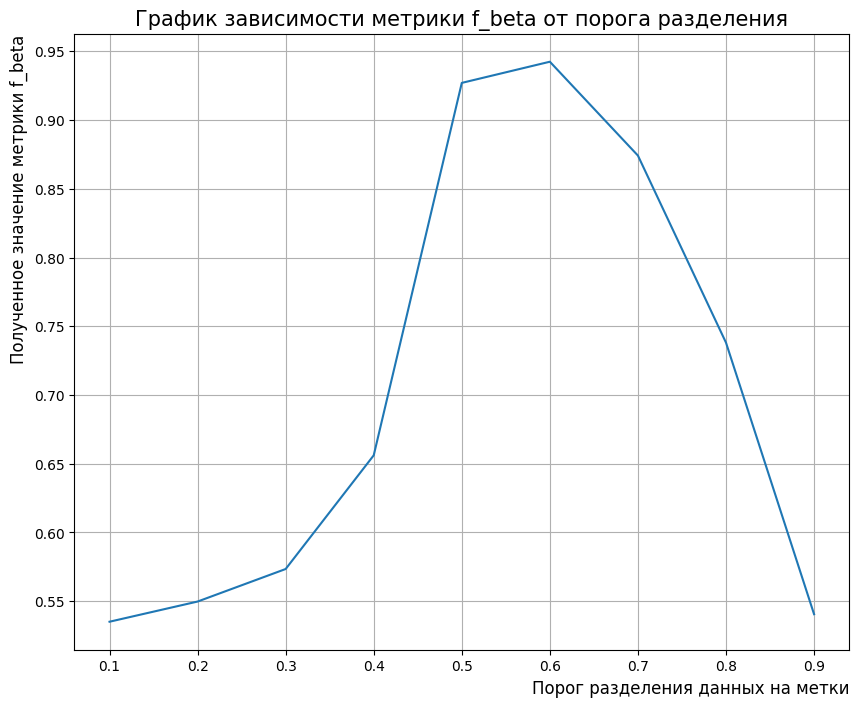

In [169]:
plt.figure(figsize=(10, 8))
plt.grid()

plt.plot(ps, f_betas)

plt.title('График зависимости метрики f_beta от порога разделения', fontsize=15)
plt.xlabel('Порог разделения данных на метки', fontsize=12, loc='right')
plt.ylabel('Полученное значение метрики f_beta', fontsize=12, loc='top')

plt.show()

## Интерпретация модели [5 баллов]

Часто нам хочется интерпритировать предсказания модели - понять, как наши признаки влияют на её ответ.
В случае сложных моделей сделать это не просто - чем сложнее модель, тем более сложные закономерности она извлекает и тем тяжелее нам их понять.

Но в случае линейной регресии это просто сделать, посмотрев на её обучаемые параметры (вспоминайте!).

Получите список признаков, которые увеличивают вероятность метки 0.
Аналогично для метки 1.

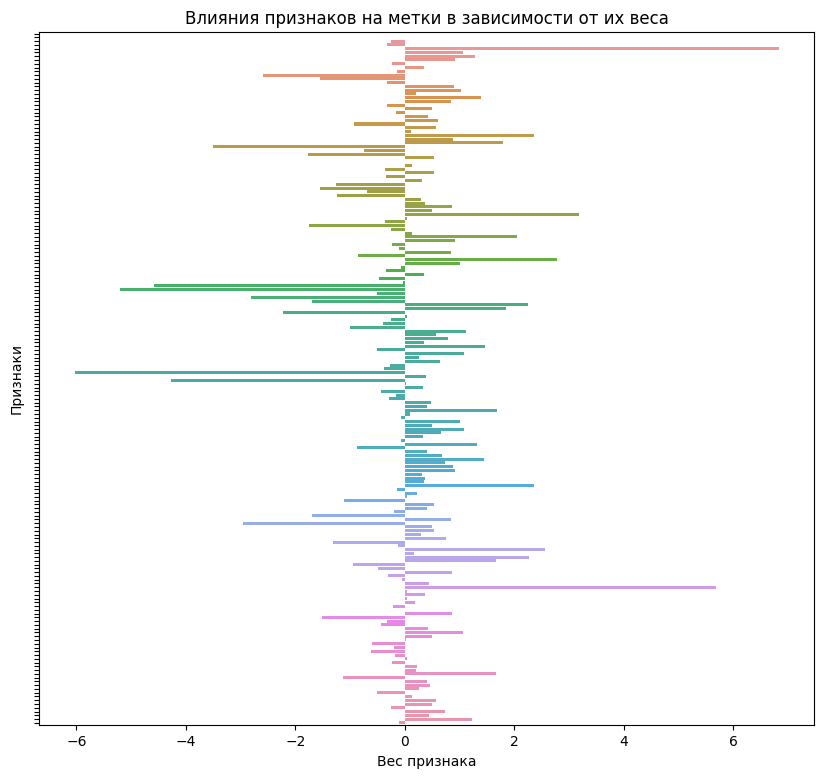

In [93]:
# Ваш код здесь

plt.figure(figsize = (10, 9))
j = sns.barplot(x=log.coef_[0], y=x_train.columns)
j.set(yticklabels=[])
plt.title('Влияния признаков на метки в зависимости от их веса')
plt.xlabel('Вес признака')
plt.ylabel('Признаки')
plt.show()

На графике, признаки уклоняющиеся влево увеличивают вероятность метки 0, вправо - увеличивают вероятность метки 1

In [99]:
# Ваш код здесь

metka0 = []
metka1 = []
for i in range(len(log.coef_[0])):
    if log.coef_[0][i] <= 0:
        metka0.append(x_train.columns[i])
    else:
        metka1.append(x_train.columns[i])

print('Список признаков, которые увеличивают вероятность метки 0: ')
print()
for pr in metka0:
    print(pr + ';')

Список признаков, которые увеличивают вероятность метки 0: 

Автобусные линии;
Автозапчасти и аксессуары;
Агентства по аренде автомобилей;
Аксессуары для женщин;
Аптеки;
Ассоциации — гражданские, социальные и братские;
Бакалейные магазины, супермаркеты;
Боулинг-клубы;
Бытовое оборудование;
Видеопрокат;
Дантисты, ортодонтисты;
Денежные переводы;
Денежные переводы MasterCard MoneySend;
Дорожный и мостовой сборы, пошлины;
Жилье — отели, мотели, курорты;
Зоомагазины;
Зубные и медицинские лаборатории;
Изготовление и продажа меховых изделий;
Иной сервис;
Книжные магазины;
Колледжи, университеты, профессиональные школы и младшие колледжи;
Коммунальные услуги — электричество, газ, санитария, вода;
Круизные линии;
Легковой и грузовой транспорт — продажа, сервис, ремонт, запчасти и лизинг;
Лесо- и строительный материал;
Магазины second hand, магазины б/у товаров, комиссионки;
Магазины звукозаписи;
Магазины кожаных изделий, дорожных принадлежностей;
Магазины косметики;
Магазины мужской и женской 

In [100]:
print('Список признаков, которые увеличивают вероятность метки 1: ')
print()
for pr in metka1:
    print(pr + ';')

Список признаков, которые увеличивают вероятность метки 1: 

Авиалинии, авиакомпании;
Авиалинии, авиакомпании, нигде более не классифицированные;
Автоматизированные бензозаправки;
Автомойки;
Автошины;
Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка;
Агенты и менеджеры по аренде недвижимости;
Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков;
Беспошлинные магазины Duty Free;
Бизнес-сервис;
Билльярд-клубы;
Больницы;
Булочные;
Веломагазины — продажа и обслуживание;
Ветеринарные услуги;
Галереи и художественные посредники;
Галереи/учреждения видеоигр;
Генеральные подрядчики по вентиляции, теплоснабжению, и водопроводу;
Горючее топливо — уголь, нефть, разжиженный бензин, дрова;
Готовая женская одежда;
Детская одежда, включая одежду для самых маленьких;
Дилеры по продаже печатной продукции;
Доктора, нигде ранее не классифицируемые;
Драгоценные камни и металлы, часы и ювели

# Часть 4: ва-банк / пространство для творчества [макс 30 баллов]

Добейтесь максимального качества, больше качество - больше баллов.

Стратегия подготовки данных и обучения модели на ваше усмотрение.

Условия:
* Оценка на отложенной тестовой группе пользователей, использовавшейся в прошлых пунктах (20%)
* В качестве метрики используйте ROC_AUC

__Замечание__: 

Ответа на вопрос "какое нужно качество для максимального балла?" не будет.

Используйте все свои знания, чтобы добиться наилучшего результата.

In [101]:
# Ваш код здесь

print(f'ROC_AUC = {roc_auc_score(y_test, pred)}')

ROC_AUC = 0.7990487861811392


Сейчас наша метрика достигает такого результата, однако у нас был и результат повыше - до нормирования данных (и он составлял 0.8125875350140057). Попробуем теперь нормировать данные с помощью другого скейлера, и подобрать с помощью кросс-валидации новые параметры для выборки

In [105]:
x_train, x_test = train_test_split(df, test_size=0.2, random_state=R_S)

y_train = np.array(list(x_train.gender))
y_test = np.array(list(x_test.gender))

x_train.drop(columns=['gender'], inplace=True)
x_test.drop(columns=['gender'], inplace=True)

scaler = StandardScaler().fit(x_train)
X_tr = scaler.transform(x_train)
X_te = scaler.transform(x_test)
cols = list(x_train.columns.values)[1:]
for i in range(len(cols)):
    x_train[f'{cols[i]}'] = [x[i] for x in X_tr]
    x_test[f'{cols[i]}'] = [x[i] for x in X_te]

log = LogisticRegression().fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]
pred1 = [1.0 if x >= 0.5 else 0.0 for x in pred]

print(f'ROC_AUC с нормированным данными с помощью StandardScaler но без подобранных параметров = {roc_auc_score(y_test, pred)}')

ROC_AUC с нормированным данными с помощью StandardScaler но без подобранных параметров = 0.8099833683473389


In [168]:
parameter_grid = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

grid_searcher = GridSearchCV(estimator=LogisticRegression(),
                             param_grid=parameter_grid,
                             cv=4,
                             scoring='roc_auc',
                             n_jobs=-1
                            )

grid_searcher.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='roc_auc')

In [107]:
grid_searcher.best_params_

{'solver': 'sag'}

In [163]:
log = LogisticRegression(solver='sag', random_state=10).fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]
pred1 = [1.0 if x >= 0.5 else 0.0 for x in pred]

print(f'ROC_AUC с нормированным данными и подобранным solver = {roc_auc_score(y_test, pred)}')

ROC_AUC с нормированным данными и подобранным solver = 0.8142740429505136


Отлично, качество повысилось, однако для данного солвера random_state тоже важно, попробуем сначала подобрать параметры для него а потом для остальных

In [164]:
parameter_grid = {
    'solver': ['sag'],
    'random_state': range(1, 70)
}

grid_searcher = GridSearchCV(estimator=LogisticRegression(),
                             param_grid=parameter_grid,
                             cv=4,
                             scoring='roc_auc',
                             n_jobs=-1,
                             refit=True
                            )

grid_searcher.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was

GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'random_state': range(1, 70), 'solver': ['sag']},
             scoring='roc_auc')

In [165]:
grid_searcher.best_params_

{'random_state': 58, 'solver': 'sag'}

In [166]:
log = LogisticRegression(solver='sag', random_state=58).fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]
pred1 = [1.0 if x >= 0.5 else 0.0 for x in pred]

print(f'ROC_AUC с нормированным данными и подобранным solver = {roc_auc_score(y_test, pred)}')

ROC_AUC с нормированным данными и подобранным solver = 0.8140362394957983


На этот раз GridSearch не помог, подобранный им random_state не даёт такого же качества как и подобранный random_state "ручками". Посмотрим, может он сможет подобрать следующие параметры для повышения точности

In [170]:
parameter_grid = {
    'solver': ['sag'],
    'class_weight': [None, 'balanced'],
    'C': [0.1, 0.25, 0.5, 0.75, 1, 2, 10, 100, 1000],
    'max_iter': [100, 500, 1000],
    'penalty': ['l2', None],
    'random_state': [10]
}

grid_searcher = GridSearchCV(estimator=LogisticRegression(),
                             param_grid=parameter_grid,
                             cv=4,
                             scoring='roc_auc',
                             n_jobs=-1
                            )

grid_searcher.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=Non

GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1, 2, 10, 100, 1000],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 500, 1000], 'penalty': ['l2', None],
                         'random_state': [10], 'solver': ['sag']},
             scoring='roc_auc')

In [171]:
grid_searcher.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'max_iter': 1000,
 'penalty': 'l2',
 'random_state': 10,
 'solver': 'sag'}

In [182]:
log = LogisticRegression(solver='sag', random_state=10, C=0.1, class_weight='balanced', max_iter=1000, penalty='l2').fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]
pred1 = [1.0 if x >= 0.5 else 0.0 for x in pred]

print(f'ROC_AUC с нормированным данными и подобранными параметрами = {roc_auc_score(y_test, pred)}')

ROC_AUC с нормированным данными и подобранными параметрами = 0.8139764239028946


In [183]:
log = LogisticRegression(solver='sag', random_state=10, C=0.1, class_weight='balanced', max_iter=100, penalty='l2').fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]
pred1 = [1.0 if x >= 0.5 else 0.0 for x in pred]

print(f'ROC_AUC с нормированным данными и подобранными параметрами = {roc_auc_score(y_test, pred)}')

ROC_AUC с нормированным данными и подобранными параметрами = 0.8146446078431372


GridSearch помог повысить качество, однако на несколько тысячных и ошибившись с max_iter. Попробуем теперь использовать признак dt: он состоит из дня и времени, выделим из него только время и закодируем его, возможно это повысит точность

In [196]:
new_dt = []
for date in data['dt']:
    k = date.find(':')
    new_dt.append(date[k-2:])
data2 = data.copy()
data2['dt'] = new_dt

In [201]:
te = ce.target_encoder.TargetEncoder(cols='dt')
X_cat_ce = te.fit_transform(data['dt'], data['gender'])

In [203]:
data2['dt'] = X_cat_ce

In [204]:
data2

,user_id,dt,type,value,gender
457451,22899,0.535952,"Звонки с использованием телефонов, считывающих...",2695.099,1.0
771544,22899,0.535952,Станции техобслуживания,1796.733,1.0
771545,22899,0.535952,Станции техобслуживания,2471.069,1.0
457452,22899,0.535952,"Звонки с использованием телефонов, считывающих...",2695.099,1.0
1304099,22899,0.535952,Универсальные магазины,2320.031,1.0
...,...,...,...,...,...
722991,99999680,0.535952,Станции техобслуживания,1796.733,1.0
722990,99999680,0.565993,Станции техобслуживания,673.775,1.0
722989,99999680,0.576598,Станции техобслуживания,674.202,1.0
1966026,99999680,0.535952,Магазины с продажей спиртных напитков на вынос...,1574.387,1.0


In [212]:
df = data2.copy()
df = pd.pivot_table(df, values=['value', 'dt'], index='user_id', columns=['type'], aggfunc=np.sum, fill_value=0)
df['gender'] = g

In [242]:
x_train, x_test = train_test_split(df, test_size=0.2, random_state=R_S)

y_train = np.array(list(x_train.gender))
y_test = np.array(list(x_test.gender))

x_train.drop(columns=['gender'], inplace=True)
x_test.drop(columns=['gender'], inplace=True)

log = LogisticRegression().fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]
pred1 = [1.0 if x >= 0.5 else 0.0 for x in pred]

print(f'ROC_AUC = {roc_auc_score(y_test, pred)}')

ROC_AUC = 0.8133636788048553


Теперь по новой - подбираем параметры

In [219]:
parameter_grid = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

grid_searcher = GridSearchCV(estimator=LogisticRegression(),
                             param_grid=parameter_grid,
                             cv=4,
                             scoring='roc_auc',
                             n_jobs=-1
                            )

grid_searcher.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='roc_auc')

In [220]:
grid_searcher.best_params_

{'solver': 'newton-cholesky'}

In [237]:
log = LogisticRegression(solver='newton-cholesky').fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]

print(f'ROC_AUC = {roc_auc_score(y_test, pred)}')

ROC_AUC = 0.964516223155929


Точность сильно выросла, попробуем теперь подобрать нормировать данные

In [243]:
scaler = MinMaxScaler().fit(x_train)
X_tr = scaler.transform(x_train)
X_te = scaler.transform(x_test)
cols = list(x_train.columns.values)[1:]
for i in range(len(cols)):
    x_train[f'{cols[i]}'] = [x[i] for x in X_tr]
    x_test[f'{cols[i]}'] = [x[i] for x in X_te]

log = LogisticRegression().fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]

print(f'ROC_AUC с нормированными данными = {roc_auc_score(y_test, pred)}')

ROC_AUC с нормированными данными = 0.8133549253034547


In [244]:
x_train, x_test = train_test_split(df, test_size=0.2, random_state=R_S)

y_train = np.array(list(x_train.gender))
y_test = np.array(list(x_test.gender))

x_train.drop(columns=['gender'], inplace=True)
x_test.drop(columns=['gender'], inplace=True)

scaler = StandardScaler().fit(x_train)
X_tr = scaler.transform(x_train)
X_te = scaler.transform(x_test)
cols = list(x_train.columns.values)[1:]
for i in range(len(cols)):
    x_train[f'{cols[i]}'] = [x[i] for x in X_tr]
    x_test[f'{cols[i]}'] = [x[i] for x in X_te]

log = LogisticRegression().fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]

print(f'ROC_AUC с нормированными данными = {roc_auc_score(y_test, pred)}')

ROC_AUC с нормированными данными = 0.8130514705882353


Здесь нормирование данных не помогло, может быть получится улучшить качество подобрав параметры

In [246]:
x_train, x_test = train_test_split(df, test_size=0.2, random_state=R_S)

y_train = np.array(list(x_train.gender))
y_test = np.array(list(x_test.gender))

x_train.drop(columns=['gender'], inplace=True)
x_test.drop(columns=['gender'], inplace=True)

parameter_grid = {
    'solver': ['newton-cholesky'],
    'class_weight': [None, 'balanced'],
    'C': [0.1, 0.25, 0.5, 0.75, 1, 2, 10, 100, 1000],
    'max_iter': [100, 500, 1000],
    'penalty': ['l2', None]
}

grid_searcher = GridSearchCV(estimator=LogisticRegression(),
                             param_grid=parameter_grid,
                             cv=4,
                             scoring='roc_auc',
                             n_jobs=-1
                            )

grid_searcher.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #7. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #7. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear feat

GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1, 2, 10, 100, 1000],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 500, 1000], 'penalty': ['l2', None],
                         'solver': ['newton-cholesky']},
             scoring='roc_auc')

In [247]:
grid_searcher.best_params_

{'C': 0.75,
 'class_weight': 'balanced',
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cholesky'}

In [255]:
log = LogisticRegression(solver='newton-cholesky', class_weight='balanced', max_iter=100, penalty='l2', C=0.75).fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]

print(f'ROC_AUC с нормированными данными = {roc_auc_score(y_test, pred)}')

ROC_AUC с нормированными данными = 0.9647992530345472


In [263]:
log = LogisticRegression(solver='newton-cholesky', class_weight='balanced', max_iter=100, penalty='l2').fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]

print(f'ROC_AUC с нормированными данными = {roc_auc_score(y_test, pred)}')

ROC_AUC с нормированными данными = 0.9648707399626518


Мы смогли ненамного улучшить качество модели (GridSearch справился, однако подбор параметра C был лишним).
Последнее, что мы попробуем сделать - это модифицировать признаки: мы их не нормировали, может возведением в степени получится добиться лучшего результата?

In [282]:
x_train2 = x_train.pow(2)
x_test2 = x_test.pow(2)

log = LogisticRegression().fit(x_train2, y_train)
pred = log.predict_proba(x_test2)
pred = [x[1] for x in pred]

print(f'ROC_AUC = {roc_auc_score(y_test, pred)}')

ROC_AUC = 0.68999766573296


In [285]:
log = LogisticRegression(solver='newton-cholesky').fit(x_train2, y_train)
pred = log.predict_proba(x_test2)
pred = [x[1] for x in pred]

print(f'ROC_AUC = {roc_auc_score(y_test, pred)}')

ROC_AUC = 0.6898984593837535


Такое модифицирование к сожалению не сильно помогло. Также ранее упоминалось, что у нас есть айди в таблице users, которых нет в transactions, однако я считаю, что их бесполезно добавлять в наши выборки для обучения, так как у них нет никаких признаков, только метки, модель не сможет обучиться на них. 

In [286]:
log = LogisticRegression(solver='newton-cholesky', class_weight='balanced', max_iter=100, penalty='l2').fit(x_train, y_train)
pred = log.predict_proba(x_test)
pred = [x[1] for x in pred]

print(f'ROC_AUC = {roc_auc_score(y_test, pred)}')

ROC_AUC = 0.9648707399626518


Таким образом, наилучшего результата удалось добиться с помощью преобразования столбца с временем транзакции, создания из исходного датасета сводной таблицы и подбора параметров с помощью кросс-валидации